In [15]:
import yfinance as yf
nas = yf.download(tickers='^IXIC', period = '5mo', interval= '1d')

[*********************100%***********************]  1 of 1 completed


In [16]:
nas

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-06,12200.330078,12245.400391,12004.200195,12061.370117,12061.370117,4633950000
2022-06-07,11925.809570,12194.860352,11888.610352,12175.230469,12175.230469,4383960000
2022-06-08,12147.280273,12235.780273,12052.700195,12086.269531,12086.269531,4689310000
2022-06-09,12016.469727,12115.059570,11751.980469,11754.230469,11754.230469,5382110000
2022-06-10,11543.879883,11569.150391,11328.269531,11340.019531,11340.019531,5125980000
...,...,...,...,...,...,...
2022-10-31,11028.429688,11047.940430,10914.009766,10988.150391,10988.150391,4753740000
2022-11-01,11154.740234,11156.349609,10881.190430,10890.849609,10890.849609,4677520000
2022-11-02,10885.009766,10993.240234,10522.900391,10524.799805,10524.799805,5436420000


In [30]:
nas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2022-06-06 to 2022-11-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   107 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [52]:
nas['sma1'] = nas['Close'].rolling(2).mean()

In [57]:
nas['sma2'] = nas['Close'].rolling(5).mean()

In [58]:
nas['sma2'].head()

Date
2022-06-06             NaN
2022-06-07             NaN
2022-06-08             NaN
2022-06-09             NaN
2022-06-10    11883.424023
Name: sma2, dtype: float64

In [56]:
nas

,Close,sma1,sma2
Date,,,
2022-06-06,12061.370117,NaN,NaN
2022-06-07,12175.230469,12118.300293,NaN
2022-06-08,12086.269531,12130.750000,NaN
2022-06-09,11754.230469,11920.250000,NaN
2022-06-10,11340.019531,11547.125000,NaN
...,...,...,...
2022-10-31,10988.150391,11045.300293,10893.346094
2022-11-01,10890.849609,10939.500000,10905.191016
2022-11-02,10524.799805,10707.824707,10889.620020


<AxesSubplot:xlabel='Date'>

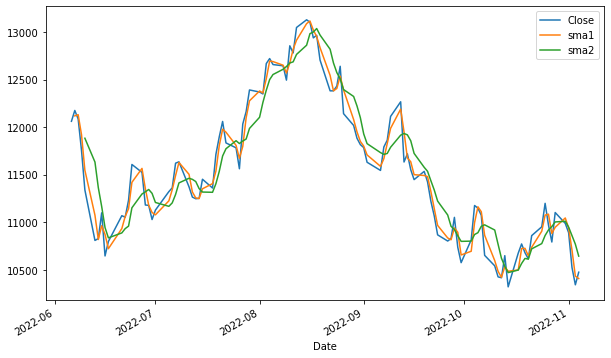

In [60]:
nas.plot(figsize=(10,6))

In [61]:
import numpy as np

In [63]:
nas['position']=np.where(nas['sma1']>nas['sma2'],1 ,-1)

In [64]:
nas.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

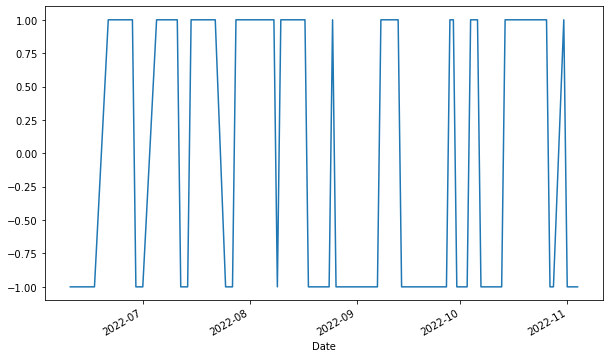

In [66]:
nas['position'].plot(ylim = [-1.1,1.1], figsize=(10,6))

In [67]:
nas['returns'] = np.log(nas['Close']/nas['Close'].shift(1))

<AxesSubplot:>

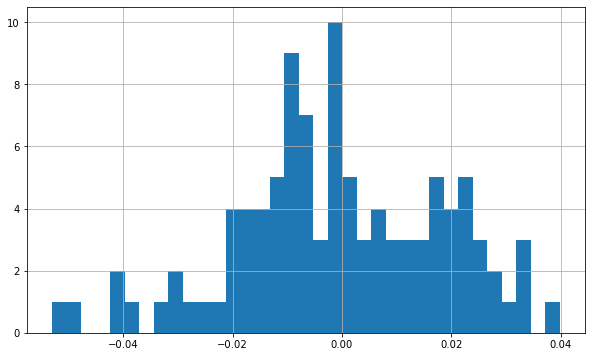

In [68]:
nas['returns'].hist(bins=35, figsize=(10, 6))

In [69]:
nas['strategy'] = nas['position'].shift(1)*nas['returns']

In [70]:
nas[['returns', 'strategy']].sum()

returns    -0.079323
strategy   -0.000673
dtype: float64

In [71]:
nas[['returns', 'strategy']].sum().apply(np.exp)

returns     0.923742
strategy    0.999328
dtype: float64

<AxesSubplot:xlabel='Date'>

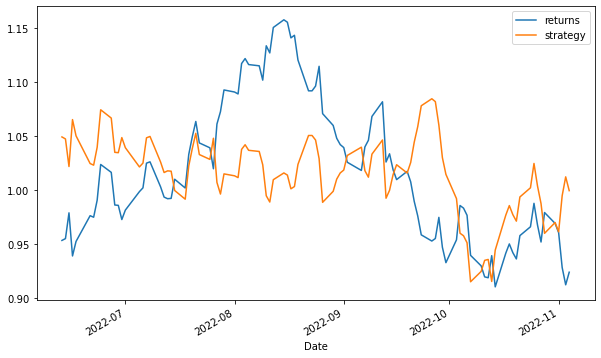

In [72]:
nas[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))